In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',100)

In [16]:
#file_path = r'C:\Users\lenovo\Desktop\customer_analysis\data'
file_name = [r'QLJ_DIM_CUSTOMER_INFO_SAMPLE.xlsx',r'VW_QLJ_FACT_CUST_ASSET_SAMPLE.xlsx',r'kyc_sample.xlsx',r'FACT_PRD_BAL_SAMPLE_1.xlsx',r'FACT_PRD_BAL_SAMPLE_2.xlsx']
file_path = r'/Users/ming/Desktop/customer_analysis/data/'

In [17]:
dim_customer_info = pd.read_excel(file_path+file_name[0], sheet_name = 0,dtype='str')
fact_cust_asset = pd.read_excel(file_path+file_name[1], sheet_name = 0,dtype='str')
kyc_sample = pd.read_excel(file_path+file_name[2], sheet_name = 0,dtype='str')

/Users/ming/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/ming/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/ming/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [18]:
print(len(dim_customer_info))
print(len(fact_cust_asset))
print(len(kyc_sample))

900
900
900


In [45]:
#combine 3 dataframes into df
df = pd.merge(dim_customer_info, fact_cust_asset, on = 'customer_id', how = 'left')
df = pd.merge(df, kyc_sample, on = 'customer_id', how = 'left')

In [20]:
df.describe()

,tradedate_x,customer_id,target_label_x,customer_id.1_x,customer_no_x,cust_code,ucub_no,sys_id,cif_account,branch_id,sub_company_code_x,sub_company_name,sub_branch_code,sub_branch_name,manager_sub_branch_code,manager_sub_branch_name,customer_name,status_id,status_name,customer_kind,customer_kind_name,certificate_type,certificate_type_name,certificate_id,id_enddate,birthday,age,constellation_id,constellation_name,profession_id,profession_name,education_id,education_name,open_date,extend_code,extend_name,open_channel_id,open_channel_name,open_activity_id,zt_flag,broker_flag,cust_prop,std_cust_flag,bank_status,custody_status,clear_status,if_prd_cust_zhlc,bank_code,sex,std_cust_date,...,customer_no.3,if_reboot_trade_flag,cust_lost_level,if_cid_flag,if_stt_push_flag,if_bind_wlc_flag,cust_covt_level,if_emp_flag,risk_low_level,if_rec_birth_coupon,if_hold_xk_flag,if_potential_service_flag,if_can_dislike_flag,if_comp_cust_flag,secu_status,if_lost_cust,if_used_xk_vou_y,authenticate_status,if_sms_blacklist_cust,sub_company_code.3,trade_date.4,customer_id.5,customer_no.4,if_jhstart_week,if_jhstart_month,if_jhstart_2month,if_jhstart_6month,if_jhstart_year,if_fylogin_year,if_jh_match_flag,if_fy_match_flag,if_ths_match_flag,if_potential_public_fund,if_potential_private_fund,if_potential_equity_product,sub_company_code.4,fm_homepage_week,stk_detail_week,chief_ina_6month,new_prod_week,etf_sps_year,jh_online_month,dxjj_week,jh_fm_month,if_qw_active_flag,if_qw_cfzb_flag,if_qw_tggzs_flag,if_jh_tgqy_1m,qw_qytg_push,qw_qytg_click
count,900,900,900,900,900,878,877,900,846,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,846,897,900,896,896,900,900,900,900,900,481,481,900,900,897,900,900,900,900,846,846,846,900,769,896,54,...,900,900,221,900,900,900,900,552,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,850,850,850,337,337,337,900,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,1,900,2,900,900,878,877,1,846,283,30,30,283,283,271,271,895,5,5,2,2,6,6,900,643,879,74,12,12,34,34,9,9,783,429,429,6,6,56,2,2,2,2,4,3,1,1,15,2,8,...,900,1,4,2,2,1,4,2,2,3,3,4,2,1,2,1,2,3,2,30,1,900,900,2,2,2,2,2,2,2,2,2,2,2,1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,20240613,53656545301,0,53656545301,5365654,03000005365654,30918336,3,340100000799,4101,4300,湖南分公司,4101,河南郑州黄河路,4101,河南郑州黄河路,张鑫,1,正常,1,个人,0,身份证,530103540521121,30001231,19860616,53,9,射手座,-1,未知,3,学士,20230213,221683,221683,305,APP开户,900,0,0,普通客户,1,1,O,0,0,6001,男,20080324,...,5365654,4740001,4750002,4760001,4770001,4780001,4790003,4850001,4800001,4810002,4820002,4860000,4830001,4840001,5160003,5540001,5920001,5990000,9260001,4300,20240614,53656545301,5365654,3480001,3500001,3510001,3520001,3530001,4200001,4150001,4160001,4170001,5130000,5140001,5150000,4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,900,1,600,1,1,1,1,900,1,17,96,96,17,17,17,17,2,841,841,897,897,894,894,1,143,2,30,87,87,183,183,416,416,4,11,11,469,469,217,678,862,890,846,836,837,846,900,202,466,16,...,1,900,123,455,565,900,425,544,882,859,755,793,899,900,863,900,872,762,899,96,900,1,1,726,641,602,559,528,861,647,834,847,334,334,337,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#NA value counts
na_counts = df.isnull().sum()
na_value = na_counts[na_counts > 0].sort_values(ascending=False)
len(na_value)

166

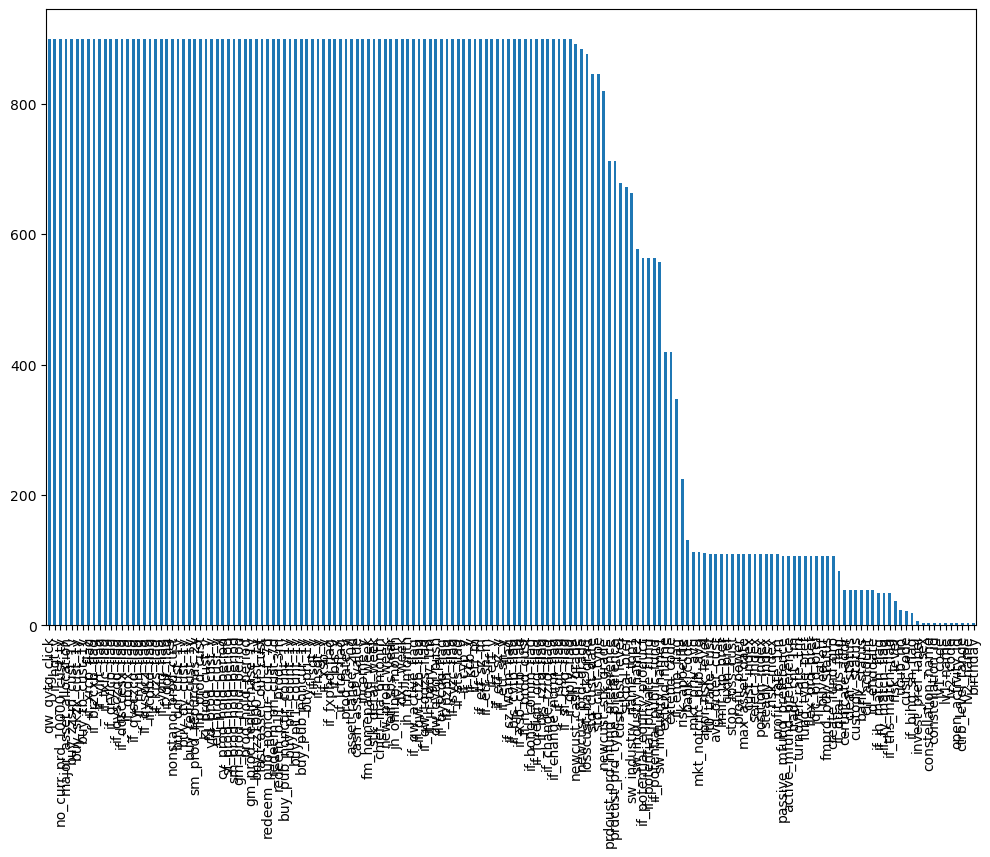

In [22]:
plt.figure(figsize=(12,8))
na_value.plot(kind = 'bar')
plt.show()

In [46]:
df_dropna = df.dropna(axis=1)

In [49]:
columns_todrop = ['customer_id.1','customer_id.1_x','customer_id.1_y','customer_id.2','customer_id.3','customer_id.4','customer_id.5']
df_drop = df_dropna.drop(columns=columns_todrop)

In [51]:
df_drop.describe()

,tradedate_x,customer_id,target_label_x,customer_no_x,sys_id,branch_id,sub_company_code_x,sub_company_name,sub_branch_code,sub_branch_name,manager_sub_branch_code,manager_sub_branch_name,customer_name,status_id,status_name,customer_kind,customer_kind_name,certificate_type,certificate_type_name,certificate_id,age,profession_id,profession_name,education_id,education_name,open_date,open_channel_id,open_channel_name,zt_flag,broker_flag,cust_prop,std_cust_flag,if_prd_cust_zhlc,addr,if_fund_ina_flag_x,close_date,customer_type,if_first_cust,tradedate_y,target_label_y,tradedate.1,by_month,total_asset_total,asset_total_end_new,asset_total_end_reduce,net_asset_total,trade_asset,asset_total_stock,stock_asset_ab,fund_asset_exch,...,bal_out_comp_range,asset_total_stock_range,asset_total_cash_range,asset_total_bank_range,co_asset_total_range,avg_asset_3m_range,avg_asset_6m_range,avg_asset_1y_range,avg_asset_y_range,max_asset_1y_range,max_asset_range,fund_in_3m_range,income_rate_y_range,balance_income_rate_y_range,stk_income_rate_y_range,prd_income_rate_y_range,if_ctrb_y,debts_total_range,stock_asset_rate_1m,prod_asset_rate_1m,cash_asset_rate_1m,sub_company_code.2,trade_date.3,customer_no.3,if_reboot_trade_flag,if_cid_flag,if_stt_push_flag,if_bind_wlc_flag,cust_covt_level,risk_low_level,if_rec_birth_coupon,if_hold_xk_flag,if_potential_service_flag,if_can_dislike_flag,if_comp_cust_flag,secu_status,if_lost_cust,if_used_xk_vou_y,authenticate_status,if_sms_blacklist_cust,sub_company_code.3,trade_date.4,customer_no.4,if_jhstart_week,if_jhstart_month,if_jhstart_2month,if_jhstart_6month,if_jhstart_year,if_fylogin_year,sub_company_code.4
count,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,...,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900
unique,1,900,2,900,1,283,30,30,283,283,271,271,895,5,5,2,2,6,6,900,74,34,34,9,9,783,6,6,2,2,2,2,1,879,2,21,2,2,1,2,1,1,459,459,459,459,389,205,178,76,...,7,9,7,10,11,11,11,10,11,11,12,9,6,6,5,4,2,5,11,11,11,30,1,900,1,2,2,1,4,2,3,3,4,2,1,2,1,2,3,2,30,1,900,2,2,2,2,2,2,30
top,20240613,53656545301,0,5365654,3,4101,4300,湖南分公司,4101,河南郑州黄河路,4101,河南郑州黄河路,张鑫,1,正常,1,个人,0,身份证,530103540521121,53,-1,未知,3,学士,20230213,305,APP开户,0,0,普通客户,1,0,,0,29990101,1,1,20240614,0,20240614,202406,0,0,0,0,0,0,0,0,...,3930001,3970001,3980001,4180001,4120001,4000001,4010001,4020001,4030001,4040001,4050001,4060001,4080001,4090001,4100001,4110001,4260001,4070000,5490000,5500000,5510010,4300,20240614,5365654,4740001,4760001,4770001,4780001,4790003,4800001,4810002,4820002,4860000,4830001,4840001,5160003,5540001,5920001,5990000,9260001,4300,20240614,5365654,3480001,3500001,3510001,3520001,3530001,4200001,4300
freq,900,1,600,1,900,17,96,96,17,17,17,17,2,841,841,897,897,894,894,1,30,183,183,416,416,4,469,469,678,862,890,846,900,18,890,863,897,864,900,600,900,900,410,410,410,410,450,696,723,825,...,850,703,747,618,540,538,536,533,536,521,438,741,854,789,847,879,676,893,690,572,440,96,900,1,900,455,565,900,425,882,859,755,793,899,900,863,900,872,762,899,96,900,1,726,641,602,559,528,861,96


In [69]:
substrings = ['trade_date.','tradedate.','customer_no.','sub_company_code.','trade_date_','tradedate_','customer_no_','sub_company_code_','target_label_']
matching_columns = [col for col in df_drop.columns if any(substring in col for substring in substrings)]
matching_columns

['target_label_x', 'target_label_y']

In [70]:
df_drop = df_drop.drop(columns = matching_columns)

In [83]:
#数值类型转换
df_test = df_drop.copy()

# 遍历每一列，尝试将可以转换为数值类型的列转换为数值类型，保留其他列为字符串类型
for col in df_test.columns:
    # 尝试将列转换为数值类型，如果成功则转换，否则保持为字符串类型
    try:
        df_test[col] = pd.to_numeric(df_test[col])
    except ValueError:
        pass  # 如果转换失败，则保持为原始类型


In [84]:
df_test.dtypes

customer_id           int64
sys_id                int64
branch_id             int64
sub_company_name     object
sub_branch_code       int64
                      ...  
if_jhstart_month      int64
if_jhstart_2month     int64
if_jhstart_6month     int64
if_jhstart_year       int64
if_fylogin_year       int64
Length: 204, dtype: object

In [94]:
df_test.corr()['target_label'].abs().sort_values(ascending=False)

target_label                   1.000000
prod_asset_rate_1m             0.819964
total_profit_y                 0.816413
asset_total_bank_range         0.803218
max_asset_1y_range             0.790294
if_jhstart_year                0.780199
co_asset_total_range           0.776163
avg_asset_3m_range             0.765275
cash_asset_rate_1m             0.760060
avg_asset_y_range              0.758333
avg_asset_6m_range             0.754010
if_jhstart_6month              0.749865
total_asset_total_range        0.745753
avg_asset_1y_range             0.735950
max_asset_range                0.717667
if_bjhg_flag                   0.704438
if_jhstart_2month              0.699508
if_bjhg_sz_flag                0.671937
if_cid_flag                    0.653721
if_jhstart_month               0.643843
cust_covt_level                0.627732
asset_inst_comp_range          0.586554
authenticate_status            0.534843
if_stt_push_flag               0.533104
if_cash_flag                   0.523238


<AxesSubplot: >

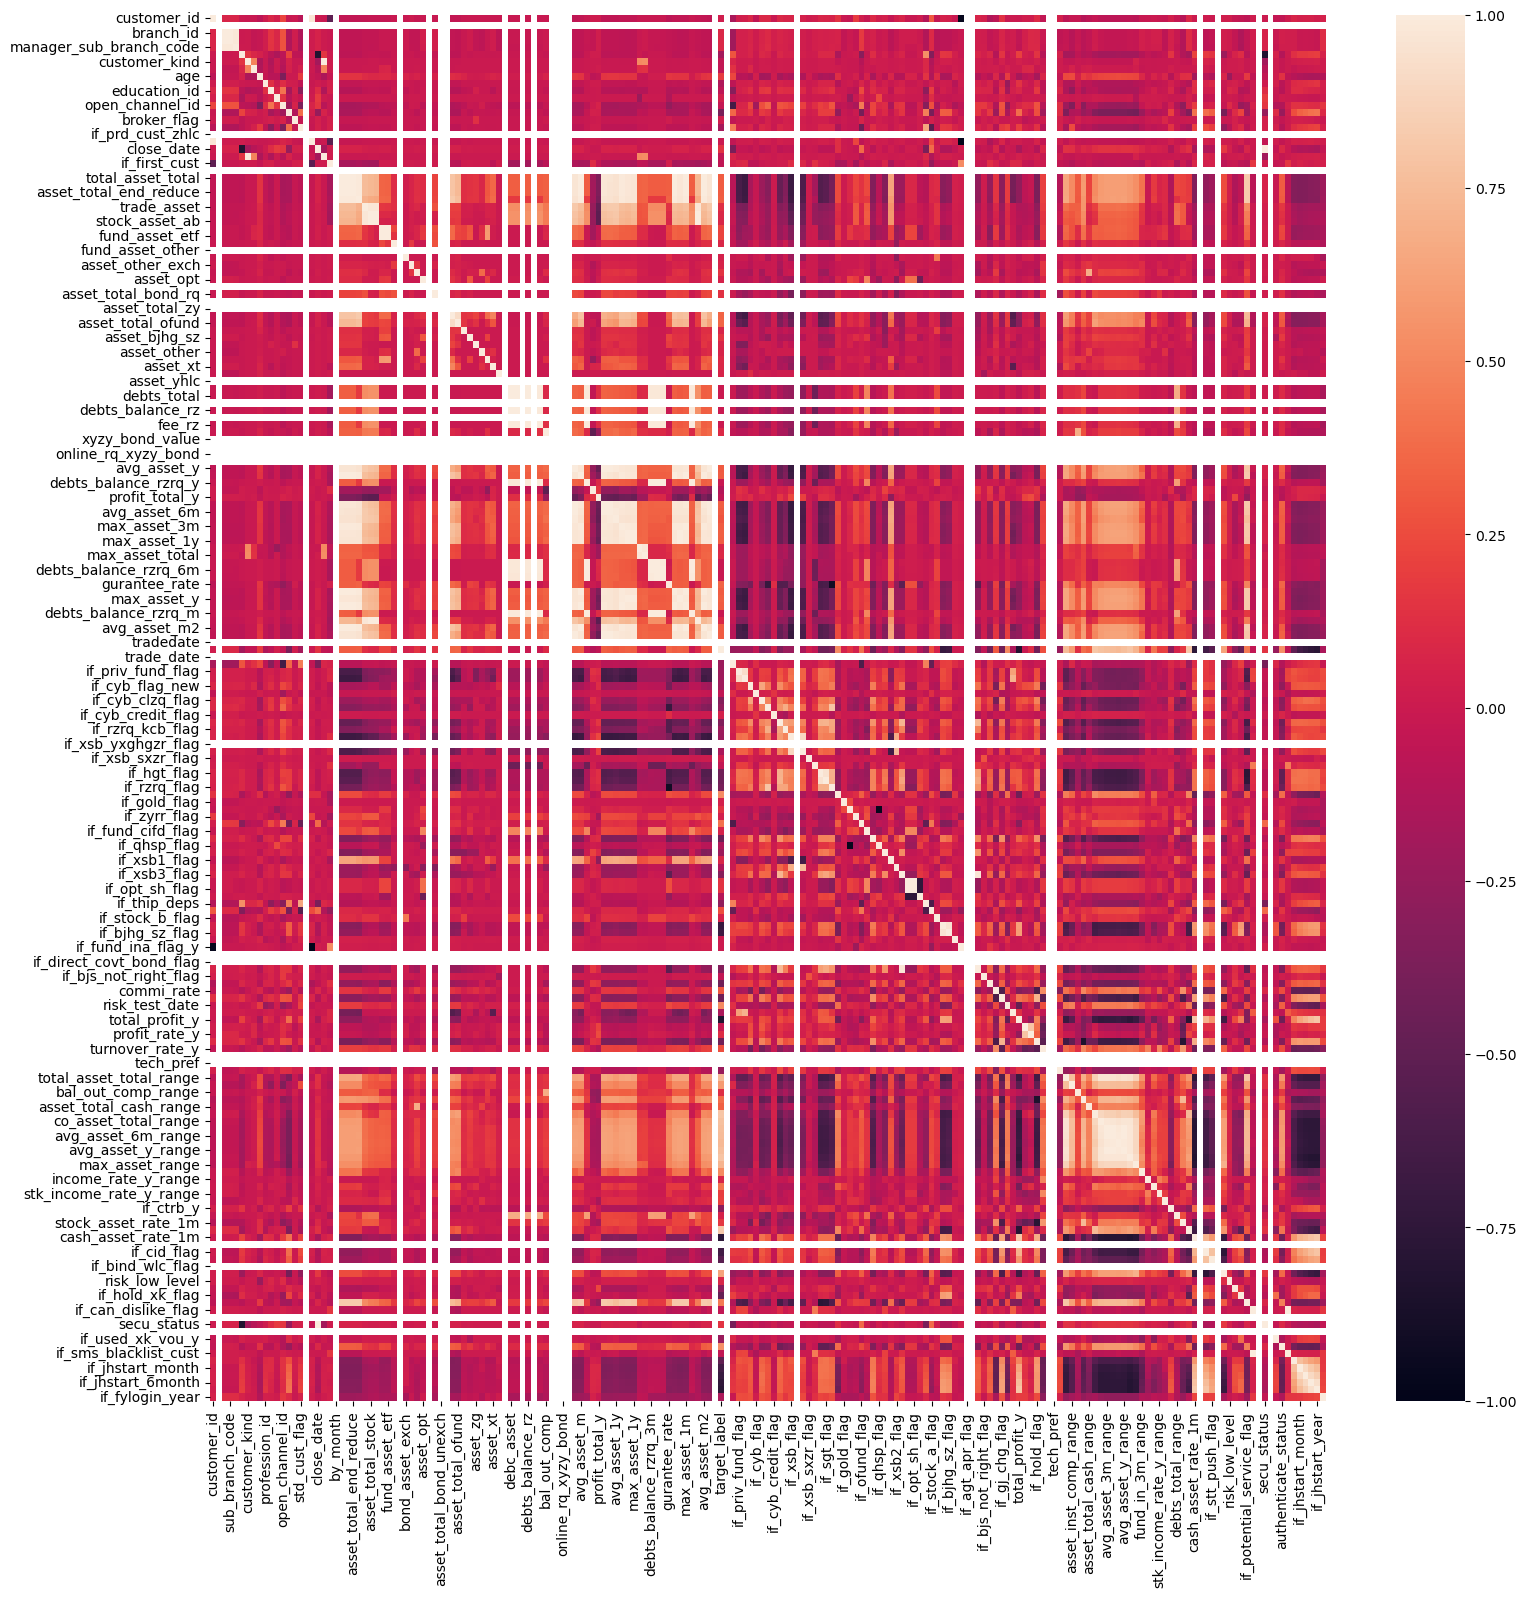

In [96]:
plt.figure(figsize=(18,18))
sns.heatmap(df_test.corr())

In [102]:
#train test split
y = df_test['target_label']
x = df_test.loc[:,df_test.columns != 'target_label']

In [103]:
x

,customer_id,sys_id,branch_id,sub_company_name,sub_branch_code,sub_branch_name,manager_sub_branch_code,manager_sub_branch_name,customer_name,status_id,status_name,customer_kind,customer_kind_name,certificate_type,certificate_type_name,certificate_id,age,profession_id,profession_name,education_id,education_name,open_date,open_channel_id,open_channel_name,zt_flag,broker_flag,cust_prop,std_cust_flag,if_prd_cust_zhlc,addr,if_fund_ina_flag_x,close_date,customer_type,if_first_cust,by_month,total_asset_total,asset_total_end_new,asset_total_end_reduce,net_asset_total,trade_asset,asset_total_stock,stock_asset_ab,fund_asset_exch,fund_asset_etf,fund_asset_lof,fund_asset_other,bond_asset_exch,asset_other_exch,asset_total_cash,asset_opt,...,if_hold_flag,turnover_rate_y,if_jxb_flag,tech_pref,study_pref,total_asset_total_range,asset_inst_comp_range,bal_out_comp_range,asset_total_stock_range,asset_total_cash_range,asset_total_bank_range,co_asset_total_range,avg_asset_3m_range,avg_asset_6m_range,avg_asset_1y_range,avg_asset_y_range,max_asset_1y_range,max_asset_range,fund_in_3m_range,income_rate_y_range,balance_income_rate_y_range,stk_income_rate_y_range,prd_income_rate_y_range,if_ctrb_y,debts_total_range,stock_asset_rate_1m,prod_asset_rate_1m,cash_asset_rate_1m,if_reboot_trade_flag,if_cid_flag,if_stt_push_flag,if_bind_wlc_flag,cust_covt_level,risk_low_level,if_rec_birth_coupon,if_hold_xk_flag,if_potential_service_flag,if_can_dislike_flag,if_comp_cust_flag,secu_status,if_lost_cust,if_used_xk_vou_y,authenticate_status,if_sms_blacklist_cust,if_jhstart_week,if_jhstart_month,if_jhstart_2month,if_jhstart_6month,if_jhstart_year,if_fylogin_year
0,53656545301,3,5301,云南分公司,5301,云南昆明人民中路,5301,云南昆明人民中路,祝新昆,1,正常,1,个人,0,身份证,530103540521121,70,-1,未知,3,学士,20071017,100,现场开户,1,0,普通客户,2,0,云南省昆明市佳湖花园14-3-101,0,29990101,1,1,202406,0.0000,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,...,4640001,4650000,4660001,5030001,5040001,3910001,3920015,3930001,3970001,3980001,4180001,4120001,4000001,4010001,4020001,4030001,4040001,4050001,4060001,4080001,4090001,4100001,4110001,4260001,4070000,5490000,5500000,5510010,4740001,4760001,4770001,4780001,4790000,4800001,4810002,4820002,4860000,4830001,4840001,5160003,5540001,5920001,5990000,9260001,3480001,3500001,3510001,3520001,3530001,4200001
1,3186743304,3,3304,浙江分公司,3304,浙江衢州柯城,3304,浙江衢州柯城,童相倪,1,正常,1,个人,0,身份证,330802391019441,84,-1,未知,0,其他,19980908,100,现场开户,1,0,普通客户,2,0,浙江省衢州廿里镇横塘村,0,29990101,1,1,202406,0.0000,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,...,4640001,4650000,4660001,5030001,5040001,3910001,3920026,3930001,3970001,3980001,4180001,4120001,4000001,4010001,4020001,4030001,4040001,4050001,4060001,4080001,4090001,4100001,4110001,4260001,4070000,5490000,5500000,5510010,4740001,4760001,4770001,4780001,4790000,4800000,4810002,4820002,4860000,4830001,4840001,5160003,5540001,5920001,5990000,9260001,3480001,3500001,3510001,3520001,3530001,4200001
2,49235183401,3,3401,安徽分公司,3401,安徽合肥长江西路,3401,安徽合肥长江西路,王克翠,17,销户,1,个人,0,身份证,340111197002127529,54,-1,未知,0,其他,20060623,100,现场开户,1,0,普通客户,1,0,安徽省合肥市西市区新华苑145-303,0,20120104,1,1,202406,0.0000,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,...,4640001,4650000,4660001,5030001,5040001,3910001,3920015,3930001,3970001,3980001,4180001,4120001,4000001,4010001,4020001,4030001,4040001,4050001,4060001,4080001,4090001,4100001,4110001,4260001,4070000,5490000,5500000,5510010,4740001,4760001,4770001,4780001,4790001,4800001,4810002,4820002,4860000,4830001,4840001,5160000,5540001,5920001,5990000,9260001,3480001,3500001,3510001,3520001,3530001,4200001
3,602998164204,3,8514,湖北分公司,8514,湖北武汉徐东大街,8514,湖北武汉徐东大街,张薇,1,正常,1,个人,0,身份证,420704199307090868,30,40,房地产服务人员,4,大专,20220307,305,APP开户,0,0,普通客户,1,0,中国湖北省(鄂)武汉市武昌区友谊大道才茂街柴林东区28栋602室,0,29990101,1,1,202406,0.0000,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,...,4640001,4650000,4660001,5030001,5040001,3910001,3920015,3930001,3970001,3980001,4180001,4120001,4000001,4010001,4020001,4030001,4040001,4050